##Inormation Retrieval - CSF469
## Lab Test
## Duration: 120 mins
## Total Marks: 50
## Open book
##Instructions:
### 1. Rename code file with your "firstname and student id".
### 2. Students are required to fill the blanks with code syntax in the sections marked as <font color='RED'>(TO-DO)</font>.
## Objective:
## 1. Perform classification using text features.
## 2. Enhanced classification using pagerank.
## 3. Identification of top-5 most cited papers.

### Dataset details:
The Cora dataset consists of 2708 scientific publications classified into one of seven classes. The citation network consists of 5429 links. Each publication in the dataset is described by a 0/1-valued word vector indicating the absence/presence of the corresponding word from the dictionary. The dictionary consists of 1433 unique words.



## Load dataset

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [3]:
file_path = "./cora.content"
cora = pd.read_csv(file_path, sep='\t', header=None, low_memory=False, encoding='unicode_escape')
cora

,0,1,2,3,4,5,6,7,8,9,...,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434
0,31336,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Neural_Networks
1,1061127,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Rule_Learning
2,1106406,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
3,13195,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
4,37879,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,1128975,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2704,1128977,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2705,1128978,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2706,117328,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Case_Based


<font color='RED'>(TO-DO)</font> [2 marks]

In [ ]:
# plot the class distribution of data
_____________________________
_____________________________

<font color='RED'>(TO-DO)</font> [3 marks]

In [4]:
nodeIDs=cora.iloc[:,0]
graph = nx.DiGraph()
for node in nodeIDs:
    graph.add_node(str(node).strip())
X = _______________________  # extract text features of all the nodes
Y = _______________________  # extract the labels of all the nodes
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)
print(X.shape, Y.shape)

#### NOTE: every row of adj matrix cotains outgoing edges and column contains incoming edges

In [5]:
edge_file_path = "./cora.cites"
with open(edge_file_path,'r')as file:
  for idx, line in enumerate(file):
    nodes = line.strip().split()
    node1=str(nodes[0])
    node2=str(nodes[1])
    graph.add_edge(node1, node2)
adjacency_matrix = nx.adjacency_matrix(graph)
A_dense = np.array(adjacency_matrix.todense())


## PageRank

<font color='RED'>(TO-DO)[8 marks] </font>

NOTE: Construct transition matrix using following steps:
1. If a row of adjacency matrix has no 1’s, then replace each element by 1/N. For all other rows proceed as follows.
2. Divide each 1 in adjacency matrix by the number of 1’s in its row. Thus, if there is a row with three 1’s, then each of them is replaced by 1/3.
3. Multiply the resulting matrix by 1 − α.
4. Add α/N to every entry of the resulting matrix, to obtain new
transition matrix.

Thus, $M_{hat} = \alpha * M + \frac {1-\alpha}{n}J$

where $M$ is transition matrix, and $J$ is $n\times n$ martrix of 1's.

In [ ]:
iter=100
n = len(A_dense)
L = np.zeros_like(A_dense, dtype=float)
alpha = 0.85
for i in range(n):
    out_links = np.sum(A_dense[i], axis=0)
    # print(out_links)

    #construct transition matrix
    _____________________________
    _____________________________
    _____________________________


pagerank = ________________      # Initialize the PageRank vector with uniform distribution

for i in range(iter):
    ___________________________________    # pagerank equation here
    if np.linalg.norm(new_pagerank - pagerank, ord=1) < 1e-8:
        # print(i)
        break
    pagerank = new_pagerank

print(pagerank[:10])
sorted_indices = np.argsort(-pagerank.flatten())
sorted_vector = pagerank[sorted_indices]

[0.00021676 0.00019856 0.00030474 0.00019193 0.00019193 0.00024786
 0.00025147 0.00020748 0.00033959 0.00055442]


## Classification using KNN

<font color='RED'>(TO-DO) [10 marks]</font>

In [ ]:
def knn_predict(X_train, y_train, X_test, k):         # manual implementation of KNN algorithm
    predictions = []
    for x in X_test:
        distances = __________________________            # compute distance between training and test points
        ________________________________________          # get the indices of closest k neighbours
        ________________________________________          # get the labels of closest k neighbours
        ________________________________________          # count the number of neighbours belonging to each class
        ________________________________________          # assign the class to which maximum neighbours belong

        predictions.append(prediction)
    return np.array(predictions)


### Random Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42, stratify=Y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2166, 1433), (2166,), (542, 1433), (542,))

<font color='RED'>(TO-DO) [4 marks]</font>

In [ ]:
# Use the KNN classifier to make predictions
accuracy_arr = []
k_values = np.arange(1,6)
# print(k_values)
for k in k_values:
  predictions_knn = knn_predict(__train features___, ___train labels___, _____test features__,k)
  accuracy_knn = accuracy_score(______, __________)
  print(f"KNN Accuracy with {k} neighbours:", accuracy_knn)
  accuracy_arr.append(accuracy_knn)

<font color='RED'>(TO-DO) [7 marks]</font>

In [ ]:
# classwise Precision, Recall
_________________________________
_________________________________
_________________________________
#write code to compute precision and recall for all classes

<font color='RED'>(TO-DO) [2 marks]</font>

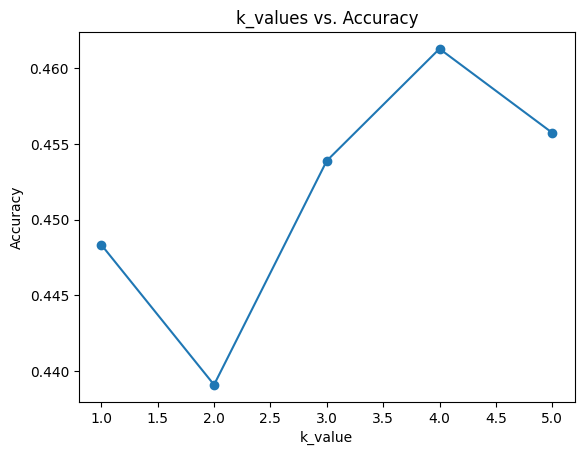

In [ ]:
# Plot k-values vs accuracy
import matplotlib.pyplot as plt
plt.plot(_____, _______, marker='o')   # fill up blank arguements
plt.title('k_values vs. Accuracy')
plt.xlabel('k_value')
plt.ylabel('Accuracy')
plt.show()

### PageRank based split

<font color='RED'>(TO-DO) [4 marks]</font>

In [ ]:
# First split the datapoints based on pagerank value. Split into ratio 80/20.
# For example: Top 80% datapoints with highest pagerank form the train data and rest 20% form test data.
___________________________
___________________________   # code for splitting data
___________________________
X_train_sorted = __________________
X_test_sorted = ___________________
y_train_sorted = ___________________
y_test_sorted = ___________________
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

In [ ]:
# Apply KNN classifier in the similar way as above

In [ ]:
# Plot k-values vs accuracy as above


## Find out Top-5 cited papers in entire graph utilizing HITS


<font color='RED'>(TO-DO) [5 marks]</font>

In [ ]:
# find the top cited papers in whole graph
_______________________________________
_______________________________________
for i in range(5):
    print(f"PaperID: {________________}, Score: {__________________}")

## Top-5 cited papers in class "Neural-networks" and "Genetic-Algorithms" respectively

<font color='RED'>(TO-DO) [5 marks]</font>

In [ ]:
# Find the top cited papers in classes "Neural Networks" and "Genetic ALgorithms"
__________________________________
__________________________________
__________________________________

